# 14 - Sampling Distribution & the Central Limit Theorem (CLT)

**Central Limit Theorem:** If you keep taking averages of samples, they'll form a bell curve (normal distribution), even if the original data wasn't bell-shaped.

**Key Idea:** Sample means are more predictable than individual observations.

**Rule of Thumb:** Works when sample size ≥ 30

**Why It Matters:** This is THE reason we can use normal distributions for inference, even when the population isn't normal!

## Simple Example: Jellybeans in a Jar

Grab handfuls of jellybeans. Each handful has a different mix, but the averages form a bell curve.

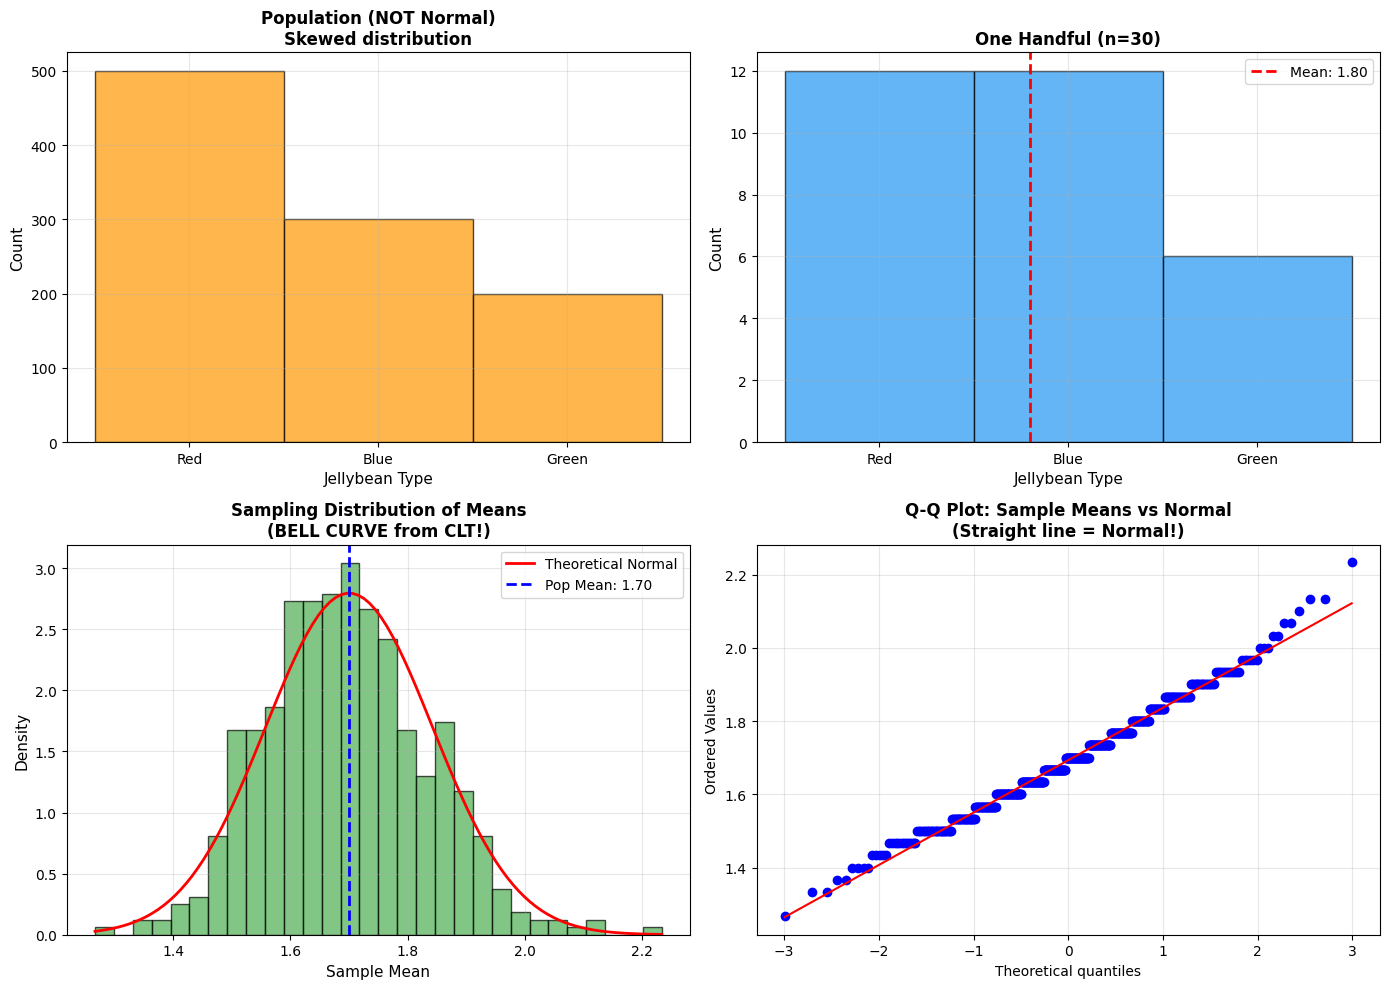


🫘 Central Limit Theorem Demonstration:

Population (1000 jellybeans):
   → Mean: 1.70
   → SD: 0.78
   → Shape: NOT normal (skewed)

Sampling Distribution (500 samples of size 30):
   → Mean of sample means: 1.69
   → SD of sample means (Standard Error): 0.143
   → Theoretical SE: 0.143
   → Shape: NORMAL (bell curve)!

💡 CLT Magic:
   → Population was NOT normal, but sample means ARE normal
   → Standard Error = 0.143 (much smaller than pop SD of 0.78)
   → Sample means are more predictable than individual values!


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Population: Mix of jellybeans (NOT normally distributed)
# Let's say we have red, blue, green with different proportions
# Assign numeric values: Red=1, Blue=2, Green=3
np.random.seed(42)
population = np.concatenate([
    np.ones(500),      # 500 red (value 1)
    np.ones(300) * 2,  # 300 blue (value 2)
    np.ones(200) * 3   # 200 green (value 3)
])
np.random.shuffle(population)

# Take 500 handfuls of 30 jellybeans each
n_samples = 500
sample_size = 30
sample_means = []

for _ in range(n_samples):
    sample = np.random.choice(population, size=sample_size, replace=False)
    sample_means.append(np.mean(sample))

sample_means = np.array(sample_means)

# Visualize
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Original population (NOT normal)
ax1 = axes[0, 0]
ax1.hist(population, bins=[0.5, 1.5, 2.5, 3.5], color='#FF9800', alpha=0.7, edgecolor='black')
ax1.set_xlabel('Jellybean Type', fontsize=11)
ax1.set_ylabel('Count', fontsize=11)
ax1.set_title('Population (NOT Normal)\nSkewed distribution', fontsize=12, fontweight='bold')
ax1.set_xticks([1, 2, 3])
ax1.set_xticklabels(['Red', 'Blue', 'Green'])
ax1.grid(alpha=0.3)

# Single sample of 30
ax2 = axes[0, 1]
single_sample = np.random.choice(population, size=sample_size, replace=False)
ax2.hist(single_sample, bins=[0.5, 1.5, 2.5, 3.5], color='#2196F3', alpha=0.7, edgecolor='black')
ax2.axvline(np.mean(single_sample), color='red', linestyle='--', linewidth=2, 
           label=f'Mean: {np.mean(single_sample):.2f}')
ax2.set_xlabel('Jellybean Type', fontsize=11)
ax2.set_ylabel('Count', fontsize=11)
ax2.set_title('One Handful (n=30)', fontsize=12, fontweight='bold')
ax2.set_xticks([1, 2, 3])
ax2.set_xticklabels(['Red', 'Blue', 'Green'])
ax2.legend()
ax2.grid(alpha=0.3)

# Sampling distribution of means (IS normal!)
ax3 = axes[1, 0]
ax3.hist(sample_means, bins=30, density=True, alpha=0.7, color='#4CAF50', edgecolor='black')

# Overlay theoretical normal curve
pop_mean = np.mean(population)
pop_std = np.std(population, ddof=1)
std_error = pop_std / np.sqrt(sample_size)
x_norm = np.linspace(sample_means.min(), sample_means.max(), 100)
normal_curve = stats.norm.pdf(x_norm, pop_mean, std_error)
ax3.plot(x_norm, normal_curve, 'r-', linewidth=2, label='Theoretical Normal')
ax3.axvline(pop_mean, color='blue', linestyle='--', linewidth=2, label=f'Pop Mean: {pop_mean:.2f}')
ax3.set_xlabel('Sample Mean', fontsize=11)
ax3.set_ylabel('Density', fontsize=11)
ax3.set_title('Sampling Distribution of Means\n(BELL CURVE from CLT!)', fontsize=12, fontweight='bold')
ax3.legend()
ax3.grid(alpha=0.3)

# Q-Q plot to check normality
ax4 = axes[1, 1]
stats.probplot(sample_means, dist="norm", plot=ax4)
ax4.set_title('Q-Q Plot: Sample Means vs Normal\n(Straight line = Normal!)', fontsize=12, fontweight='bold')
ax4.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n🫘 Central Limit Theorem Demonstration:")
print(f"\nPopulation (1000 jellybeans):")
print(f"   → Mean: {pop_mean:.2f}")
print(f"   → SD: {pop_std:.2f}")
print(f"   → Shape: NOT normal (skewed)")

print(f"\nSampling Distribution ({n_samples} samples of size {sample_size}):")
print(f"   → Mean of sample means: {np.mean(sample_means):.2f}")
print(f"   → SD of sample means (Standard Error): {np.std(sample_means, ddof=1):.3f}")
print(f"   → Theoretical SE: {std_error:.3f}")
print(f"   → Shape: NORMAL (bell curve)!")

print(f"\n💡 CLT Magic:")
print(f"   → Population was NOT normal, but sample means ARE normal")
print(f"   → Standard Error = {std_error:.3f} (much smaller than pop SD of {pop_std:.2f})")
print(f"   → Sample means are more predictable than individual values!")

## Real-World Example: Polling 1,000 Voters

Individual voters are unpredictable, but averages of many samples are normally distributed.

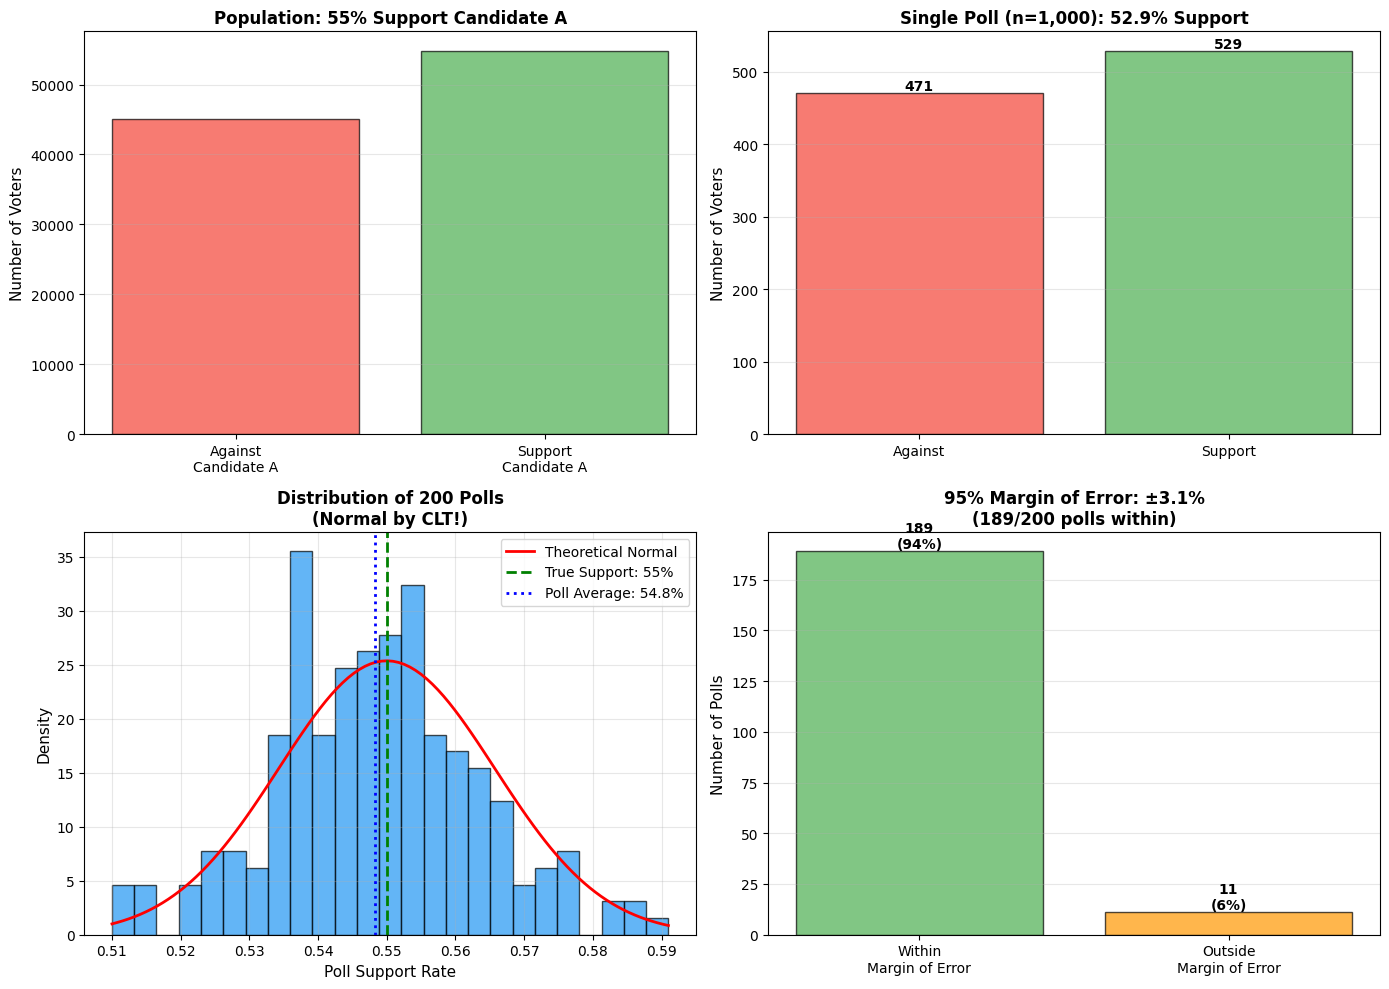


📊 Polling Analysis with CLT:

True population support: 55%

Standard Error: 0.016 (1.6 percentage points)
Margin of Error (95%): ±3.1%

Poll results (200 polls of 1000 voters):
   → Average: 54.8%
   → SD: 0.015
   → Range: 51.0% to 59.1%

💡 CLT in Action:
   → 189 polls (94%) within margin of error
   → Poll results form normal distribution around true value
   → Larger sample size → smaller standard error → more accurate polls

🎯 Why this matters:
   → We can quantify uncertainty in polls
   → Know how much polls might vary from truth
   → This is the foundation of polling methodology!


In [2]:
# Population: 55% support candidate A, 45% support candidate B
# Binary: 1 = support A, 0 = support B
true_support = 0.55
population_size = 100000
population_votes = np.random.binomial(1, true_support, population_size)

# Conduct 200 polls, each with 1000 voters
n_polls = 200
poll_size = 1000
poll_results = []

np.random.seed(42)
for _ in range(n_polls):
    poll_sample = np.random.choice(population_votes, size=poll_size, replace=False)
    poll_results.append(np.mean(poll_sample))

poll_results = np.array(poll_results)

# Calculate standard error
pop_std_votes = np.std(population_votes, ddof=1)
standard_error = pop_std_votes / np.sqrt(poll_size)

# Visualize
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Individual voters (binary)
ax1 = axes[0, 0]
voter_counts = [np.sum(population_votes == 0), np.sum(population_votes == 1)]
ax1.bar(['Against\nCandidate A', 'Support\nCandidate A'], voter_counts, 
       color=['#F44336', '#4CAF50'], alpha=0.7, edgecolor='black')
ax1.set_ylabel('Number of Voters', fontsize=11)
ax1.set_title(f'Population: {true_support:.0%} Support Candidate A', fontsize=12, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

# Single poll result
ax2 = axes[0, 1]
single_poll = np.random.choice(population_votes, size=poll_size, replace=False)
single_poll_support = np.mean(single_poll)
single_counts = [np.sum(single_poll == 0), np.sum(single_poll == 1)]
bars = ax2.bar(['Against', 'Support'], single_counts, 
              color=['#F44336', '#4CAF50'], alpha=0.7, edgecolor='black')
ax2.set_ylabel('Number of Voters', fontsize=11)
ax2.set_title(f'Single Poll (n=1,000): {single_poll_support:.1%} Support', fontsize=12, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)
for bar, count in zip(bars, single_counts):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{count}', ha='center', va='bottom', fontweight='bold')

# Distribution of poll results (CLT!)
ax3 = axes[1, 0]
ax3.hist(poll_results, bins=25, density=True, alpha=0.7, color='#2196F3', edgecolor='black')

# Theoretical normal curve
x_poll = np.linspace(poll_results.min(), poll_results.max(), 100)
normal_poll = stats.norm.pdf(x_poll, true_support, standard_error)
ax3.plot(x_poll, normal_poll, 'r-', linewidth=2, label='Theoretical Normal')
ax3.axvline(true_support, color='green', linestyle='--', linewidth=2, 
           label=f'True Support: {true_support:.0%}')
ax3.axvline(np.mean(poll_results), color='blue', linestyle=':', linewidth=2,
           label=f'Poll Average: {np.mean(poll_results):.1%}')
ax3.set_xlabel('Poll Support Rate', fontsize=11)
ax3.set_ylabel('Density', fontsize=11)
ax3.set_title(f'Distribution of {n_polls} Polls\n(Normal by CLT!)', fontsize=12, fontweight='bold')
ax3.legend()
ax3.grid(alpha=0.3)

# Margin of error visualization
ax4 = axes[1, 1]
margin_of_error = 1.96 * standard_error  # 95% confidence
ci_lower = true_support - margin_of_error
ci_upper = true_support + margin_of_error

# Show how many polls fall within margin of error
within_moe = np.sum((poll_results >= ci_lower) & (poll_results <= ci_upper))
outside_moe = n_polls - within_moe

ax4.bar(['Within\nMargin of Error', 'Outside\nMargin of Error'], 
       [within_moe, outside_moe],
       color=['#4CAF50', '#FF9800'], alpha=0.7, edgecolor='black')
ax4.set_ylabel('Number of Polls', fontsize=11)
ax4.set_title(f'95% Margin of Error: ±{margin_of_error:.1%}\n({within_moe}/{n_polls} polls within)', 
             fontsize=12, fontweight='bold')
ax4.grid(axis='y', alpha=0.3)
for i, val in enumerate([within_moe, outside_moe]):
    ax4.text(i, val, f'{val}\n({val/n_polls:.0%})', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n📊 Polling Analysis with CLT:")
print(f"\nTrue population support: {true_support:.0%}")
print(f"\nStandard Error: {standard_error:.3f} ({standard_error*100:.1f} percentage points)")
print(f"Margin of Error (95%): ±{margin_of_error:.1%}")

print(f"\nPoll results ({n_polls} polls of {poll_size} voters):")
print(f"   → Average: {np.mean(poll_results):.1%}")
print(f"   → SD: {np.std(poll_results, ddof=1):.3f}")
print(f"   → Range: {poll_results.min():.1%} to {poll_results.max():.1%}")

print(f"\n💡 CLT in Action:")
print(f"   → {within_moe} polls ({within_moe/n_polls:.0%}) within margin of error")
print(f"   → Poll results form normal distribution around true value")
print(f"   → Larger sample size → smaller standard error → more accurate polls")

print(f"\n🎯 Why this matters:")
print(f"   → We can quantify uncertainty in polls")
print(f"   → Know how much polls might vary from truth")
print(f"   → This is the foundation of polling methodology!")

## Summary: Central Limit Theorem

### The Magic of CLT
**No matter what the population looks like, sample means will be normally distributed!**

### Key Points
1. **Sample means are normal** (even if population isn't)
2. **Mean of sample means = population mean**
3. **Standard Error = population SD / √n** (gets smaller with larger samples)
4. **Works when n ≥ 30** (rule of thumb)

### Why It's Revolutionary
- **Enables inference:** We can use normal distribution for hypothesis tests
- **Quantifies uncertainty:** Standard error tells us how variable sample means are
- **Justifies polling:** Why 1,000 voters can represent millions
- **Foundation of statistics:** Most inference methods rely on CLT

### Real-World Impact
- **Political polling:** 1,000 voters predict national opinion
- **Quality control:** Sample batches predict population quality
- **A/B testing:** Sample users predict all user behavior
- **Medical trials:** Sample patients predict treatment effects

### Important Notes
- Larger samples → more normal distribution
- Larger samples → smaller standard error → more precision
- CLT explains why normal distribution is everywhere in statistics

**Remember:** The CLT is why we can make confident statements about populations based on samples!